In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [308]:
diamond = pd.read_csv('diamonds.csv')

In [309]:
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [310]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [311]:
diamond.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [312]:
diamond.columns
diamond.drop(['Unnamed: 0'] , axis=1 , inplace=True)
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [313]:
def converter(cut):
    if cut == "Ideal":
        return int(1)
    elif cut == "Premium":
        return int(2)
    elif cut == "Very Good":
        return int(3)
    elif cut == "Good":
        return int (4)
    elif cut == "Fair":
        return int(5) 
diamond["cut"] = diamond["cut"].apply(converter)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [314]:
def converter(color):
    if color == "D":
        return int(1)
    elif color == "E":
        return int(2)
    elif color == "F":
        return int(3)
    elif color == "G":
        return int (4)
    elif color == "H":
        return int(5) 
    elif color == "I":
        return int(6) 
    elif color == "J":
        return int(7) 
diamond["color"] = diamond["color"].apply(converter)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,2,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,2,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,2,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,6,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,7,SI2,63.3,58.0,335,4.34,4.35,2.75


In [315]:
def converter(clarity):
    if clarity == "IF":
        return int(1)
    elif clarity == "VVS1":
        return int(2)
    elif clarity == "VVS2":
        return int(3)
    elif clarity == "VS1":
        return int (4)
    elif clarity == "VS2":
        return int(5)
    elif clarity == "SI1":
        return int(6)    
    elif clarity == "SI2":
        return int(7) 
    elif clarity == "I1":
        return int(8)   
diamond["clarity"] = diamond["clarity"].apply(converter)
diamond.head()
diamond.to_csv('neu2.csv')

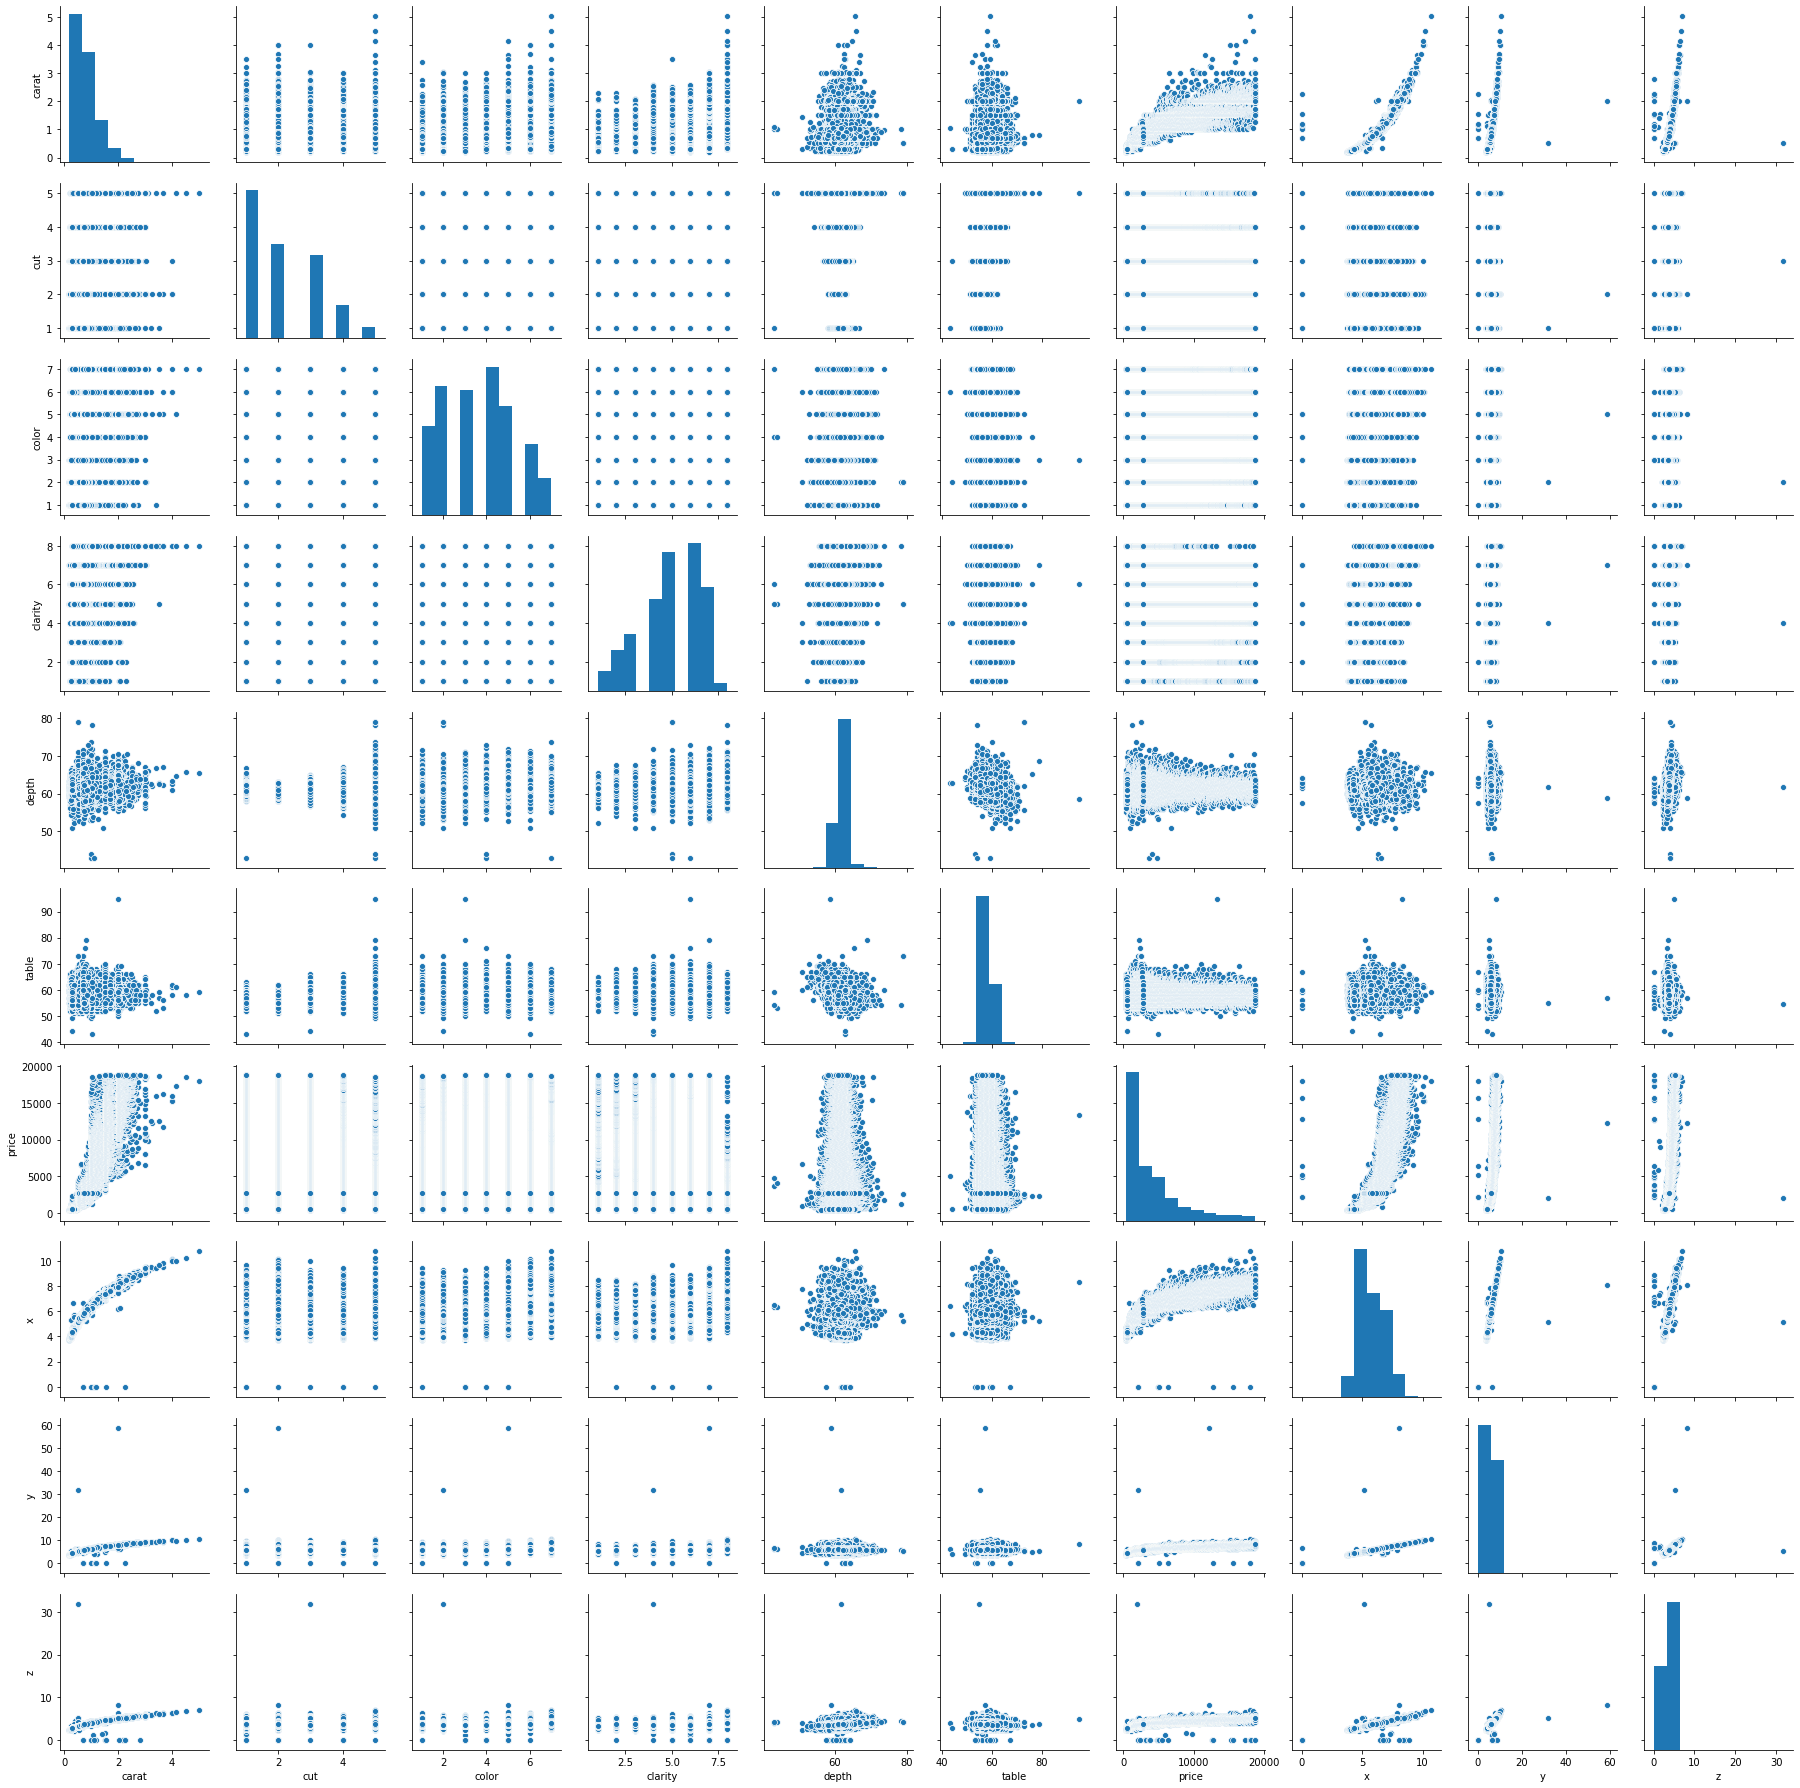

In [316]:
sns.pairplot(diamond)

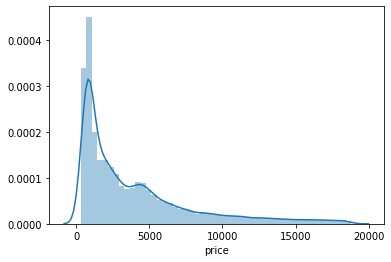

In [317]:
sns.distplot(diamond['price'])

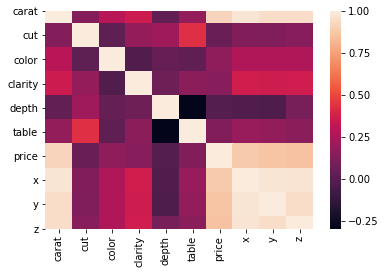

In [318]:
sns.heatmap(diamond.corr())


c:\users\annal\pycharmprojects\diamonds\venv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\annal\pycharmprojects\diamonds\venv\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


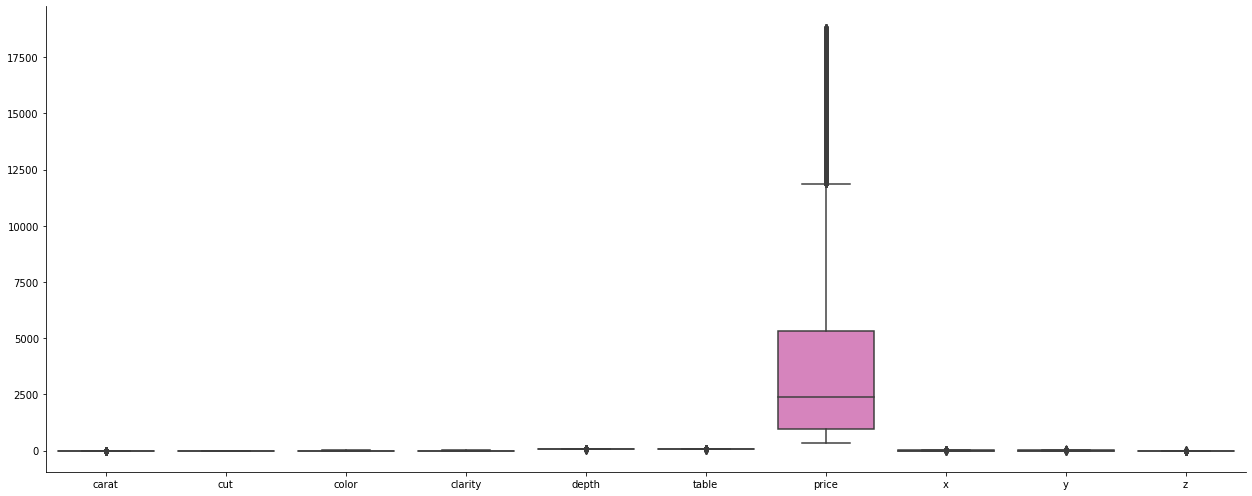

In [319]:
sns.factorplot(data=diamond , kind='box' , size=7, aspect=2.5)

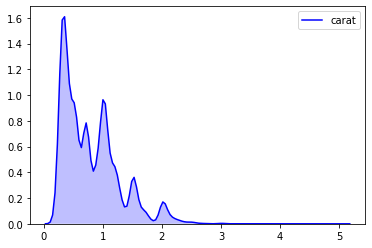

In [320]:
sns.kdeplot(diamond['carat'], shade=True , color='b')

c:\users\annal\pycharmprojects\diamonds\venv\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


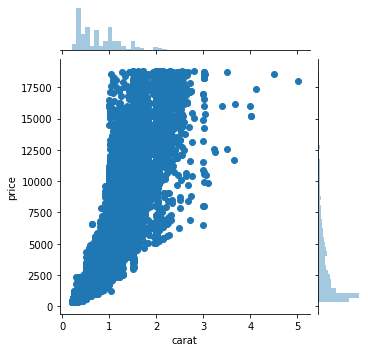

In [321]:
sns.jointplot(x='carat' , y='price' , data=diamond , size=5)

c:\users\annal\pycharmprojects\diamonds\venv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


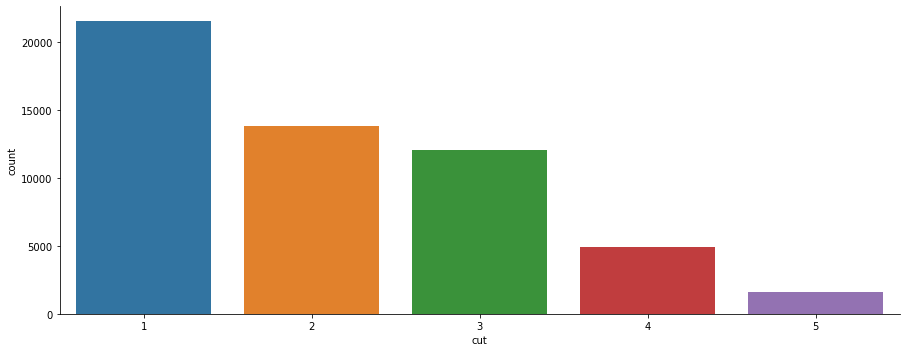

In [322]:
sns.factorplot(x='cut', data=diamond , kind='count',aspect=2.5 )

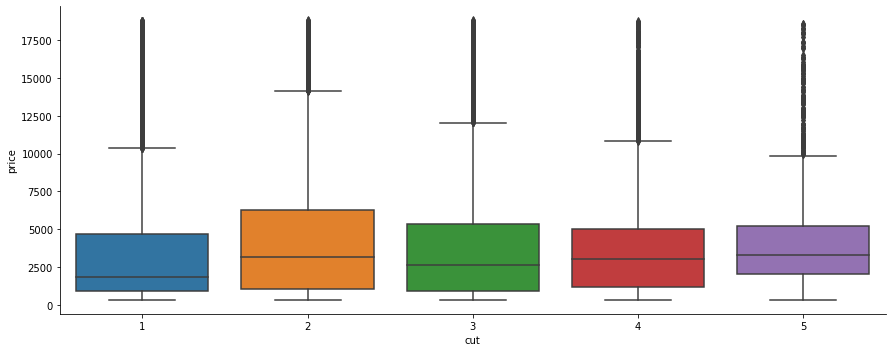

In [323]:
sns.factorplot(x='cut', y='price', data=diamond, kind='box' ,aspect=2.5 )

c:\users\annal\pycharmprojects\diamonds\venv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


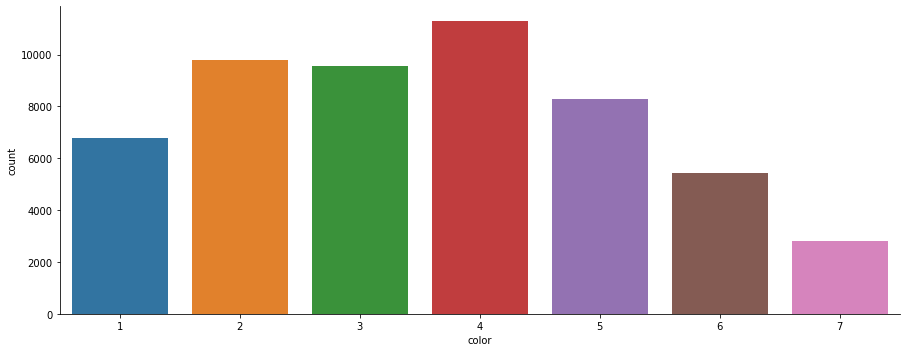

In [324]:
sns.factorplot(x='color', data=diamond , kind='count',aspect=2.5 )

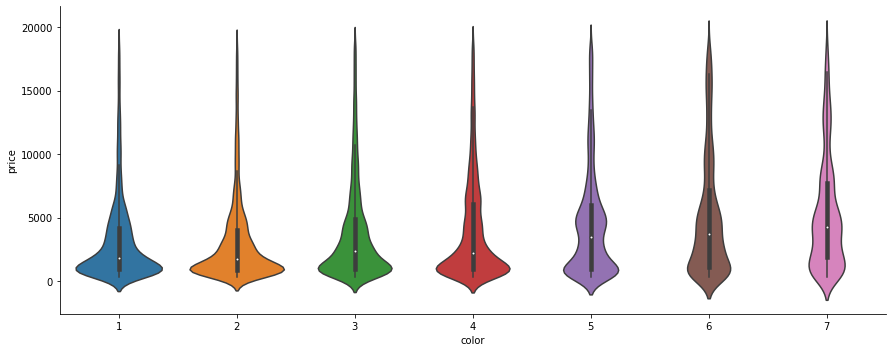

In [325]:
sns.factorplot(x='color', y='price' , data=diamond , kind='violin', aspect=2.5)

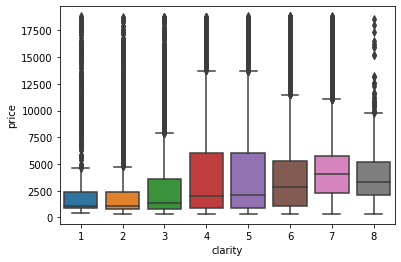

In [326]:
sns.boxplot(x='clarity', y='price', data=diamond)

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 1.1000e+01, 4.3000e+01, 2.1900e+02,
        1.4260e+03, 5.0770e+03, 1.8246e+04, 2.2654e+04, 5.0380e+03,
        8.5100e+02, 2.3400e+02, 8.7000e+01, 2.7000e+01, 1.1000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([43.  , 44.44, 45.88, 47.32, 48.76, 50.2 , 51.64, 53.08, 54.52,
        55.96, 57.4 , 58.84, 60.28, 61.72, 63.16, 64.6 , 66.04, 67.48,
        68.92, 70.36, 71.8 , 73.24, 74.68, 76.12, 77.56, 79.  ]),
 <a list of 25 Patch objects>)

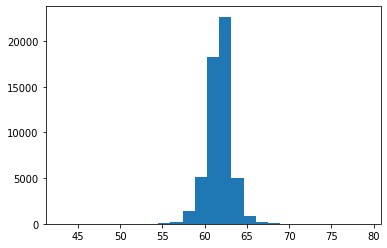

In [327]:
plt.hist('depth' , data=diamond , bins=25)

c:\users\annal\pycharmprojects\diamonds\venv\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


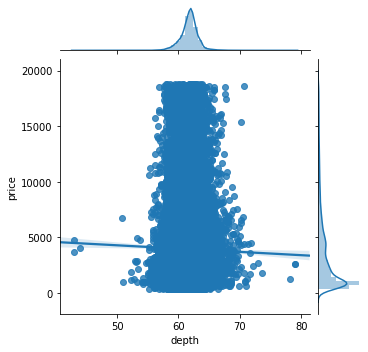

In [328]:
sns.jointplot(x='depth', y='price' , data=diamond , kind='regplot', size=5)

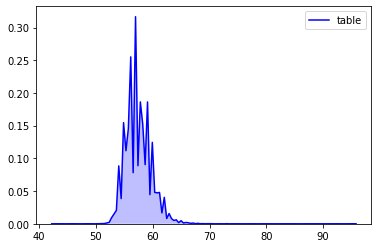

In [329]:
sns.kdeplot(diamond['table'] ,shade=True , color='b')

In [330]:
X = diamond[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = diamond['price']

In [331]:
from sklearn.model_selection import train_test_split

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=101)

In [333]:
from sklearn.linear_model import LinearRegression

In [334]:
lr = LinearRegression() 

In [335]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [336]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
carat,11227.702885
cut,-127.855942
color,-332.241548
clarity,-504.513134
depth,-61.276369
table,-16.585843
x,-1085.487717
y,110.774746
z,-103.055126


In [337]:
predictions = lr.predict(X_test)

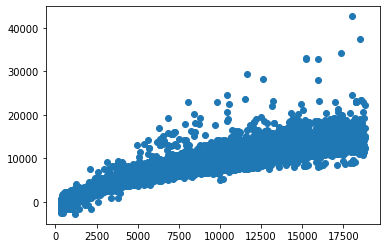

In [338]:
plt.scatter(y_test,predictions)

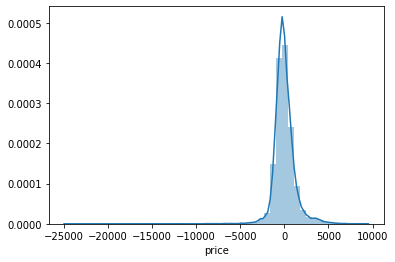

In [339]:
sns.distplot((y_test-predictions),bins=50);

In [340]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
#Prozentualer Anteil einmal ausrechnen!
#print('MSE:', metrics.mean_squared_error(y_test, predictions))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))



MAE: 806.2346055309512
